<a href="https://colab.research.google.com/github/sokhunter/face_mask_detection_app/blob/YOLO-test/Entrenar_modelo_YOLOV5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrenar modelo de YOLO con dataset custom

Hecho por: Renzo Damian
Dataset usado: https://www.kaggle.com/datasets/andrewmvd/face-mask-detection. 
  
Creación del dataset modificado: https://colab.research.google.com/drive/1x-3i5KK6WwiPH_1InuyKwmXi4R_2sZNK?usp=sharing

## Conectar Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ingresamos a la carpeta donde se encuentra el dataset y guardaremos los pesos

In [2]:
%cd drive/MyDrive/YOLO

/content/drive/MyDrive/YOLO


In [3]:
%cd augmented_data/

/content/drive/MyDrive/YOLO/augmented_data


## Clonamos y configuramos YOLO v5

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 13075, done.
remote: Total 13075 (delta 0), reused 0 (delta 0), pack-reused 13075
Receiving objects: 100% (13075/13075), 11.92 MiB | 5.84 MiB/s, done.
Resolving deltas: 100% (9089/9089), done.


In [4]:
%cd yolov5

/content/drive/MyDrive/YOLO/augmented_data/yolov5


In [ ]:
!pip uninstall imgaug
!pip install imgaug==0.4.0

In [5]:
!pip install -r requirements.txt

     |████████████████████████████████| 596 kB 5.0 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [6]:
!pip install wandb
!wandb login


     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 181 kB 72.1 MB/s 
     |████████████████████████████████| 144 kB 69.8 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=9a3f49ebf679f940d52e6d9200e9fa5dca27ef2bb1a975adaeaab9db65f6208a
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


## Entrenaomos YOLO y guardamos los pesos

In [8]:
!python train.py --img 640 --batch 32 --epochs 20 --data ../data/facemask.yaml --weights /content/drive/MyDrive/YOLO/augmented_data/yolov5/runs/train/exp7/weights/best.pt

wandb: Currently logged in as: rdamian (use `wandb login --relogin` to force relogin)
train: weights=/content/drive/MyDrive/YOLO/augmented_data/yolov5/runs/train/exp7/weights/best.pt, cfg=, data=../data/facemask.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 4 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-167-g488fb0a torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, 

## Mostrar resultados del entrenamietno

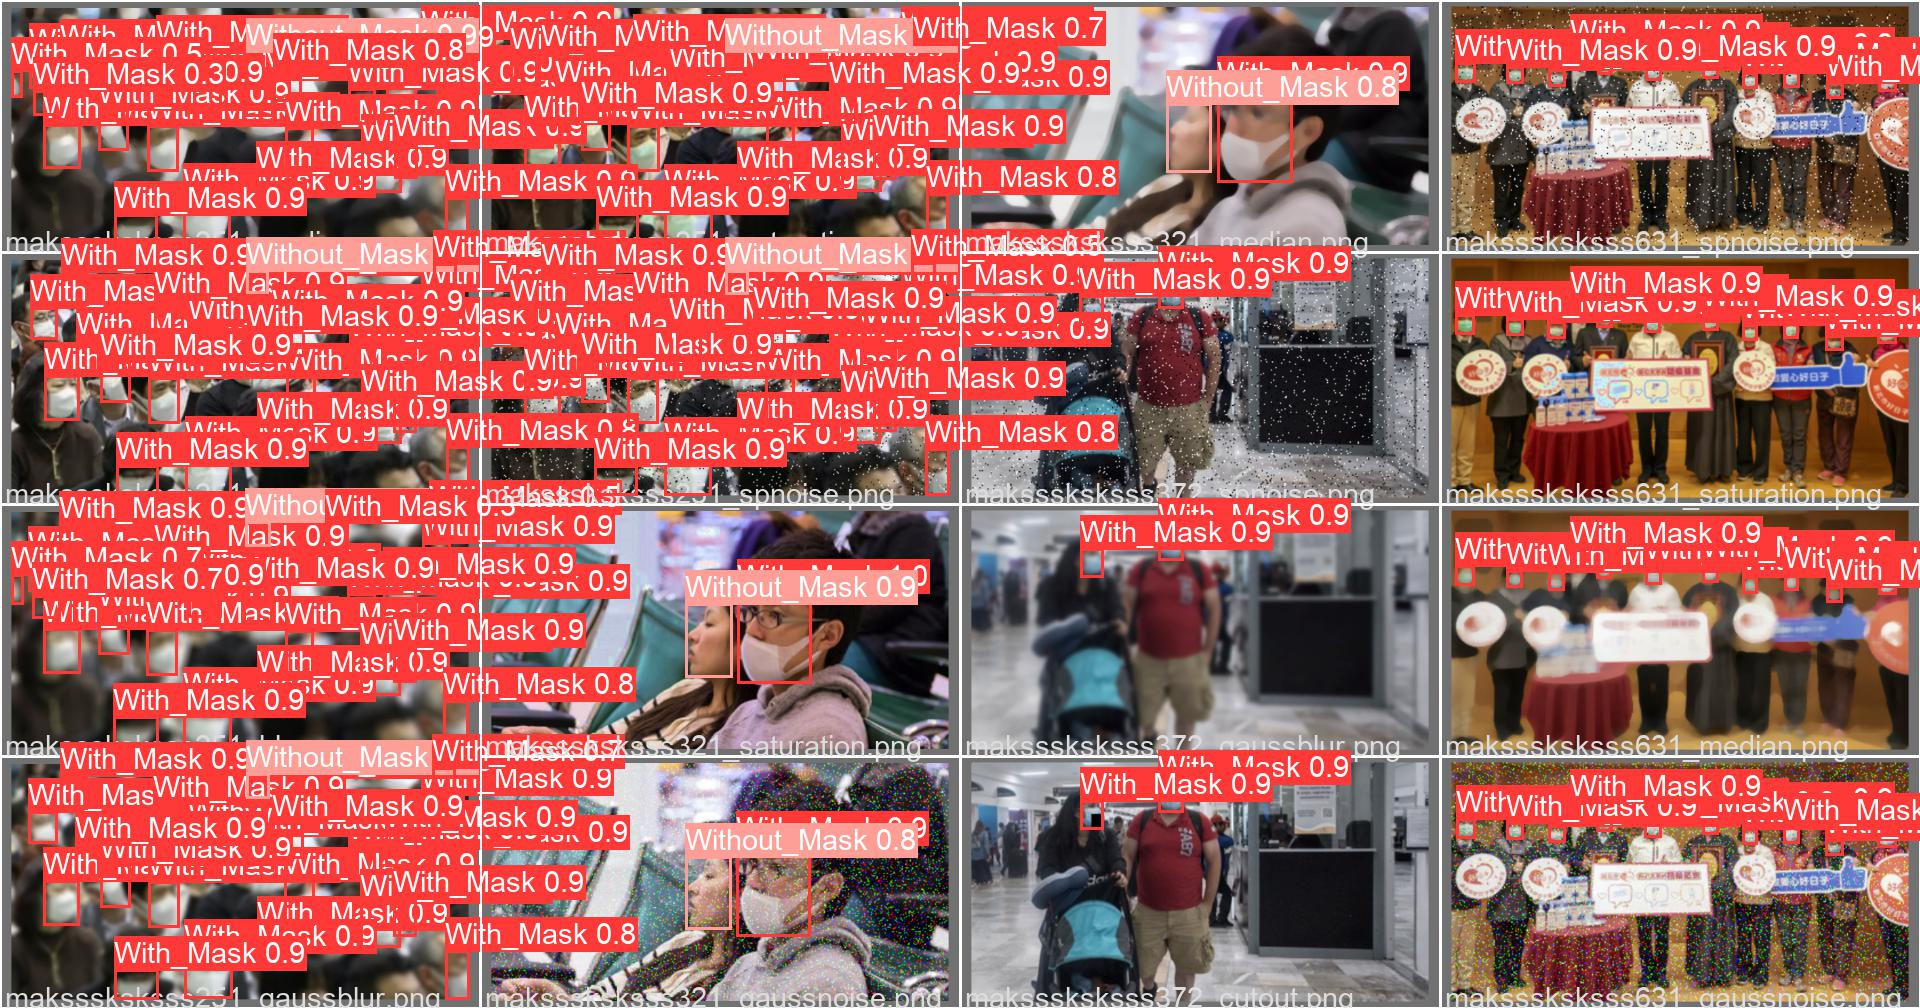

In [64]:
# display detected images
from IPython.display import Image
Image('../yolov5/runs/train/exp9/val_batch1_pred.jpg')

## Probar con una photo de internet

In [13]:
!wget https://miro.medium.com/max/1400/1*Fib1_5-NwuhPQnQb4uguMA.png -O test.png

--2022-05-03 06:44:52--  https://miro.medium.com/max/1400/1*Fib1_5-NwuhPQnQb4uguMA.png
Resolving miro.medium.com (miro.medium.com)... 162.159.153.4, 162.159.152.4, 2606:4700:7::a29f:9904, ...
Connecting to miro.medium.com (miro.medium.com)|162.159.153.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 578086 (565K) [image/png]
Saving to: ‘test.png’

test.png            100%[===================>] 564.54K  --.-KB/s    in 0.04s   

2022-05-03 06:44:52 (14.9 MB/s) - ‘test.png’ saved [578086/578086]



In [15]:
!python detect.py --source "./test.png" --weights './runs/train/exp9/weights/best.pt'

detect: weights=['./runs/train/exp9/weights/best.pt'], source=./test.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-167-g488fb0a torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 290 layers, 20861016 parameters, 0 gradients, 48.0 GFLOPs
image 1/1 /content/drive/MyDrive/YOLO/augmented_data/yolov5/test.png: 320x640 1 With_Mask, 1 Without_Mask, 1 Incorrect_Mask, Done. (0.021s)
Speed: 0.4ms pre-process, 20.6ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


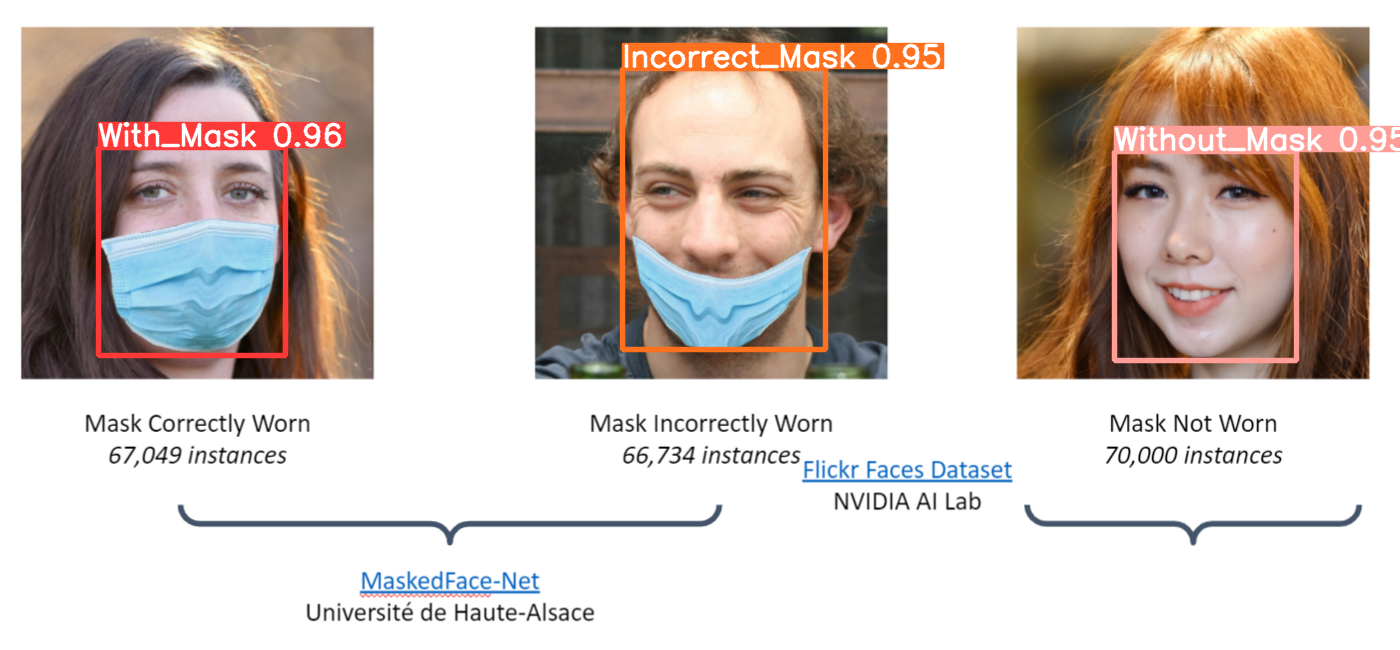

In [65]:
Image("./runs/detect/exp4/test.png")

In [66]:
!wget https://chorus.stimg.co/23400856/1mask041922.jpg -O test2.png


--2022-05-03 07:51:09--  https://chorus.stimg.co/23400856/1mask041922.jpg
Resolving chorus.stimg.co (chorus.stimg.co)... 104.16.214.83, 104.16.52.85, 2606:4700::6810:d653, ...
Connecting to chorus.stimg.co (chorus.stimg.co)|104.16.214.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 594246 (580K) [image/jpeg]
Saving to: ‘test2.png’

test2.png           100%[===================>] 580.32K  --.-KB/s    in 0.05s   

2022-05-03 07:51:09 (10.7 MB/s) - ‘test2.png’ saved [594246/594246]



In [67]:
!python detect.py --source "./test2.png" --weights './runs/train/exp9/weights/best.pt'


detect: weights=['./runs/train/exp9/weights/best.pt'], source=./test2.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-167-g488fb0a torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 290 layers, 20861016 parameters, 0 gradients, 48.0 GFLOPs
image 1/1 /content/drive/MyDrive/YOLO/augmented_data/yolov5/test2.png: 448x640 4 With_Masks, 5 Without_Masks, 1 Incorrect_Mask, Done. (0.022s)
Speed: 0.5ms pre-process, 22.2ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5


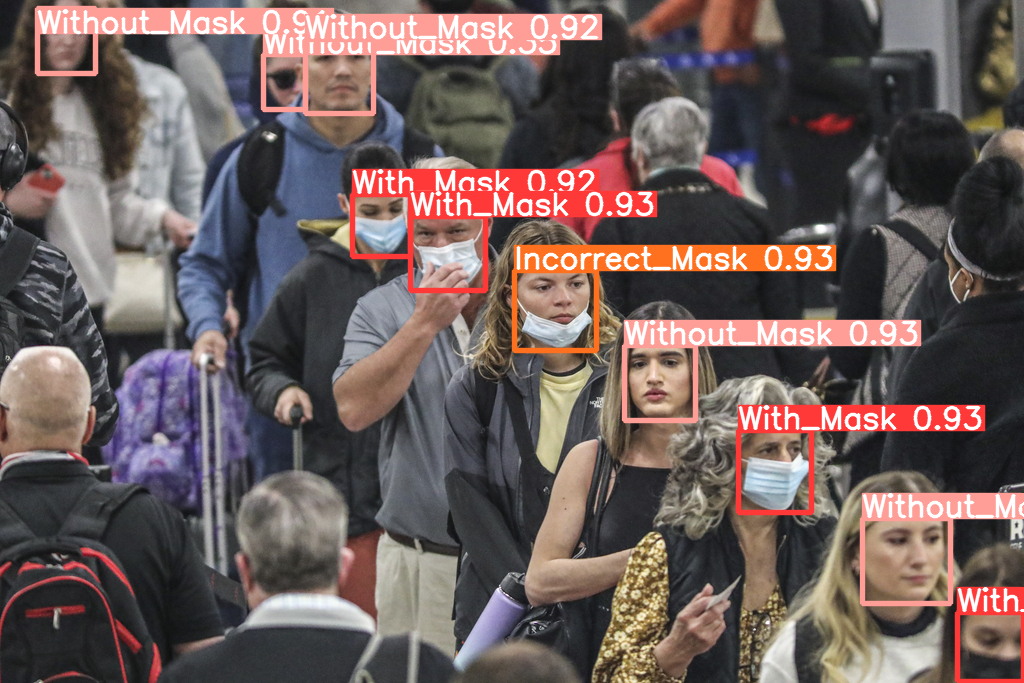

In [69]:
Image("./runs/detect/exp5/test2.png")
